## Segmentation Study on the Income Classification Dataset
---

Jason Leppelmeier 

9/13/2019

Now use clustering to segment the dataset and explore the clusters using visualizations.

I append all the data together - this is now an unsupervised learning problem. There is no need for a separate test set. Then I transform the dataset's categorical and numeric features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.cluster import KMeans

In [2]:
train = pd.read_csv('data/au_train.csv')
test = pd.read_csv('data/au_test.csv')

In [3]:
dataset = train.append(test)
dataset.reset_index(drop=True, inplace=True)
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
len(dataset)

48842

In [5]:
categorical_fields = ['workclass','marital-status','occupation', 
                      'relationship', 'race', 'sex', 'native-country', 'class']
numerical_fields = ['age','fnlwgt','capital-gain','capital-loss','hours-per-week', 'education-num']


preprocess = make_column_transformer(
    (OneHotEncoder(drop='first'), categorical_fields),
    (StandardScaler(), numerical_fields))

In [6]:
transformed = pd.DataFrame(preprocess.fit_transform(dataset).toarray())
transformed.columns = np.append(preprocess.transformers_[0][1].get_feature_names(),numerical_fields)

In [9]:
transformed.head()

,x0_ Federal-gov,x0_ Local-gov,x0_ Never-worked,x0_ Private,x0_ Self-emp-inc,x0_ Self-emp-not-inc,x0_ State-gov,x0_ Without-pay,x1_ Married-AF-spouse,x1_ Married-civ-spouse,...,x6_ Yugoslavia,x7_ <=50K.,x7_ >50K,x7_ >50K.,age,fnlwgt,capital-gain,capital-loss,hours-per-week,education-num
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.025996,-1.061979,0.146932,-0.217127,-0.034087,1.136512
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.828308,-1.007104,-0.144804,-0.217127,-2.213032,1.136512
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.046942,0.246034,-0.144804,-0.217127,-0.034087,-0.419335
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.047121,0.426663,-0.144804,-0.217127,-0.034087,-1.197259
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.776316,1.408530,-0.144804,-0.217127,-0.034087,1.136512


Now use the "elbow" method to choose an optimal number of clusters (k) for the K-means Clustering algorithm. Train the algorithm with multiple values of k. The intertia is the sum of squares within each cluster. As k increases, the inertia will decrease. Look for a value of k where the inertia begins to decrease more slowly. That will be an ideal number of clusters.

In [10]:
k_list = []
inertia_list = []

for k in range(2,10):
    km = KMeans(n_clusters=k)
    km.fit(transformed)
    k_list.append(k)
    inertia_list.append(km.inertia_)
    
parameter_tests = pd.DataFrame({"k":k_list, "inertia":inertia_list})
    

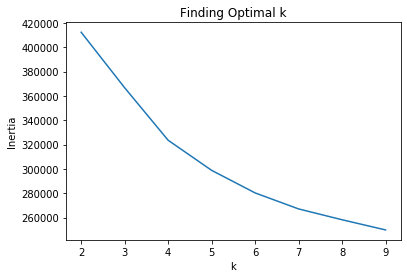

In [11]:
plt.figure() 
plt.plot(parameter_tests['k'], parameter_tests['inertia'])
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Finding Optimal k')

plt.show()

There is not a strong elbow in the inertia vs k plot for this dataset. But k=4 seems like a good number of clusters based on this plot. Now train the algorithm with k=4, and assign the resulting cluster numbers to the instances in the original dataset.

In [37]:
km = KMeans(n_clusters=4)
km.fit(transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
dataset['cluster'] = km.labels_

In [14]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,cluster
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


K-means clustering does not guarantee equal-sized clusters. Check the sizes of the clusters. 

In [15]:
dataset['cluster'].value_counts()

1    26190
0    20170
3     2238
2      244
Name: cluster, dtype: int64

In [16]:
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

Now explore the differences in features among the clusters. As the first graph shows, there are not large differences in "workclass". In this dataset, workclass is predominantly "Private".

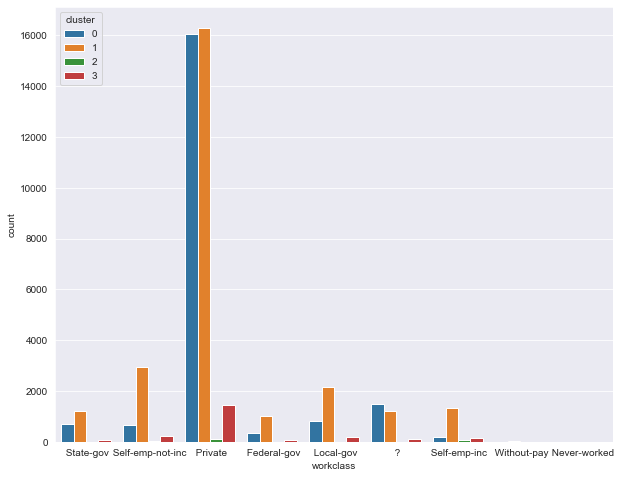

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(x='workclass', data=dataset, hue='cluster')

Differences between the clusters start to emerge when we consider "education". The first cluster, Cluster 0 (plotted in the <span style="color:blue">blue bars</span>), has very few members with education beyond a Bachelor's degree. 

Members of the second cluster, Cluster 1 (plotted in the <span style="color:orange">orange bars</span>), often have more advanced degrees, like Masters, Doctorate, or Professional degrees. 

Keep in mind - when rerunning the notebook, the clusters discussed here may change in order or color. The K-means algorithm does NOT guarantee that clusters will be discovered in an identical order on repetitive runs.

In [19]:
dataset['education'] = dataset['education'].str.strip()
# arrange education categories in the order suggested by the 'education-num' field
education_order = [
    "Preschool",
    "1st-4th",
    "5th-6th",
    "7th-8th",
    "9th",
    "10th",
    "11th",
    "12th",
    "HS-grad",
    "Some-college",
    "Assoc-voc",
    "Assoc-acdm",
    "Bachelors",
    "Masters",
    "Doctorate",
    "Prof-school"]

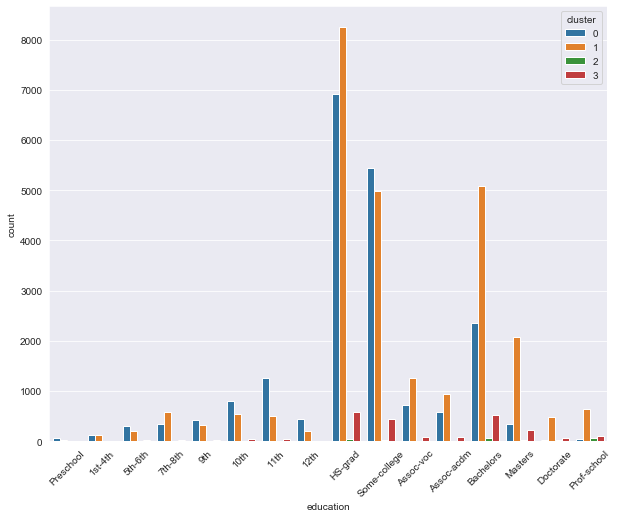

In [20]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
f = sns.countplot(x='education', data=dataset, hue='cluster', order=education_order)


Strong differences between the first and second clusters continue to emerge when we consider age. While all of the clusters do tend to have some older outliers, the boxplot below shows that the first cluster has a much younger median age than the other clusters. 

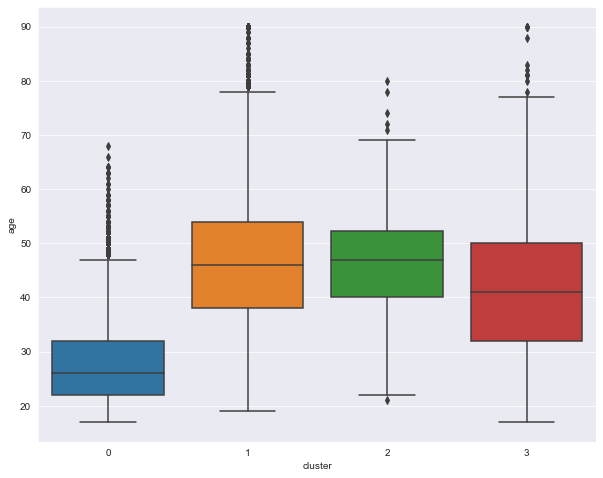

In [21]:
plt.figure(figsize=(10,8))
sns.boxplot(x='cluster', y='age', data=dataset)

The density plots provides another way to view the age differences between the clusters. And the density plot also shows that the first cluster skews toward the younger ages much more than the other clusters do. 

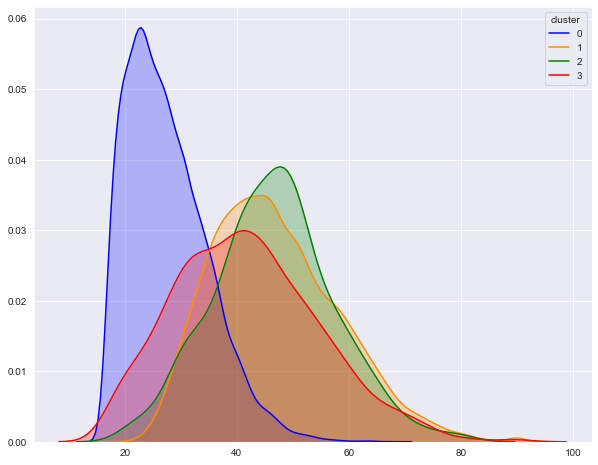

In [22]:
plt.figure(figsize=(10,8))
#sns.boxplot(x='cluster', y='age', data=dataset)
#sns.kdeplot(x='age', data=dataset)
p1=sns.kdeplot(data=dataset.loc[dataset['cluster']==0,'age'], shade=True, color="b")
p1=sns.kdeplot(data=dataset.loc[dataset['cluster']==1,'age'], shade=True, color="darkorange")
p1=sns.kdeplot(data=dataset.loc[dataset['cluster']==2,'age'], shade=True, color="g")
p1=sns.kdeplot(data=dataset.loc[dataset['cluster']==3,'age'], shade=True, color="r")
#p1=sns.kdeplot(df['sepal_length'], shade=True, color="b")
plt.legend(title='cluster', labels=['0', '1', '2', '3'])


The differences between the first and second clusters also include the hours-per-week features. There are many low and high outliers in most clusters for hours-per-week. However, members of the the first cluster, with many younger members, tend to work fewer hours per week than the members of the second cluster.

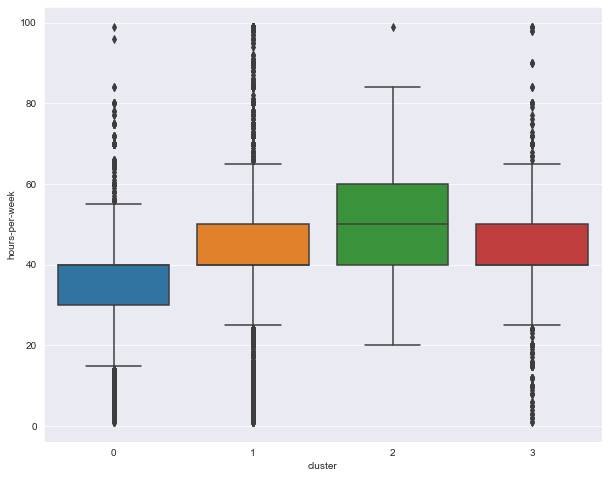

In [23]:
plt.figure(figsize=(10,8))
sns.boxplot(x='cluster', y='hours-per-week', data=dataset)

Also, in family relationships, the members of the first cluster are listed as "husband" or "wife" less often than members of the other clusters. Also, members of the first cluster are listed as Own-Child, Unmarried, Not-in-Family, or Other more frequently than the other clusters.  

In [24]:
dataset['relationship'].value_counts()

 Husband           19716
 Not-in-family     12583
 Own-child          7581
 Unmarried          5125
 Wife               2331
 Other-relative     1506
Name: relationship, dtype: int64

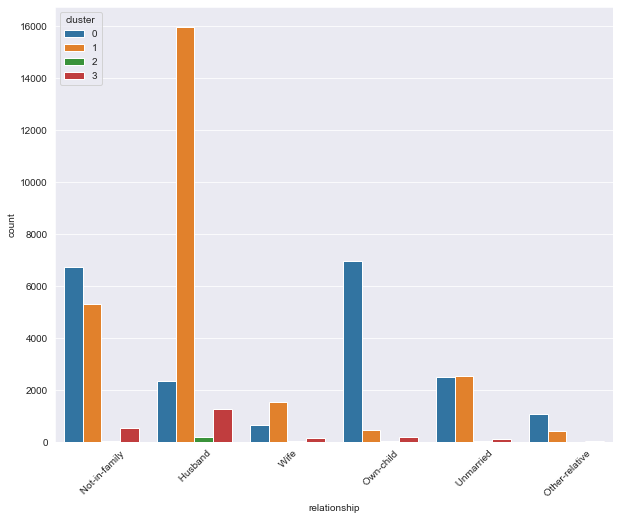

In [25]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sns.countplot(x='relationship', data=dataset, hue='cluster')

Members of this dataset are predominantly male, but the first cluster is closer to an equal mix of male and female than any of the other clusters. 

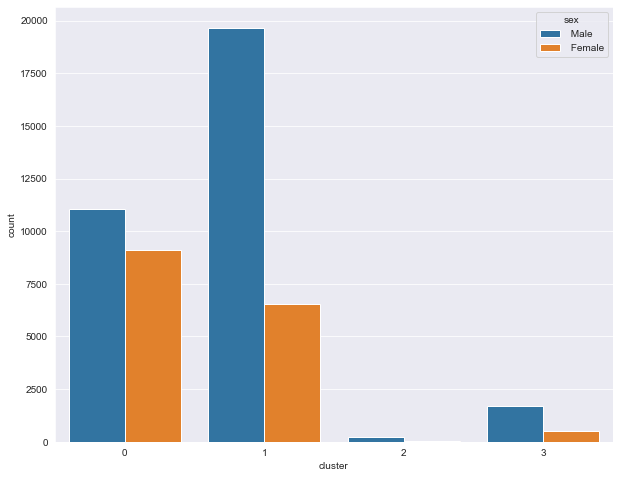

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(x='cluster', data=dataset, hue='sex')

The *native-country* feature has too many values to easily graph, but mapping the *native-country* to larger regions ("North-America", "Latin-America", and "Asia-Pacific") does allow some visualization

In [27]:
dataset['native-country'] = dataset['native-country'].str.strip()

In [28]:
region_lookup = pd.read_csv('region_lookup.csv')

In [29]:
region_lookup.head()

,country,region
0,United-States,North-America
1,Mexico,Latin-America
2,?,?
3,Philippines,Asia-Pacific
4,Germany,Europe


In [30]:
dataset = dataset.merge(region_lookup, how='left', left_on='native-country', right_on='country')

In [31]:
dataset.drop(columns='country',inplace=True)

In [32]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,cluster,region
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,North-America
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,North-America
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,North-America
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,North-America
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,Latin-America


The *native-countries* for all of the clusters are predominantly in the North-America region (Canada or US). To allow for better visualization, I have plotted the regions for each cluster on a log-scale. There are relatively few differences among the clusters' regions. 

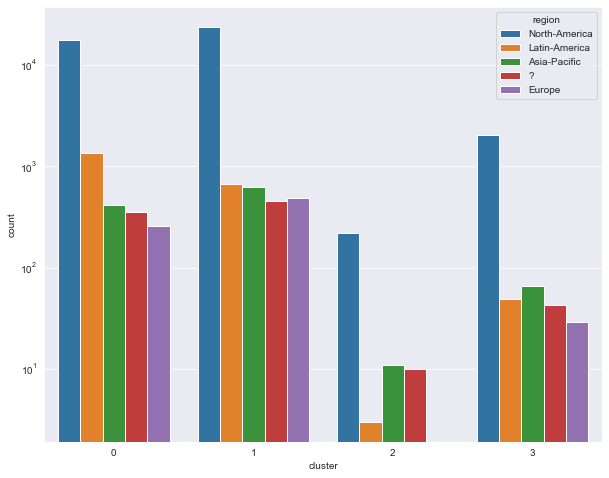

In [33]:
plt.figure(figsize=(10,8))
f = sns.countplot(x='cluster', data=dataset, hue='region')
f.set_yscale("log")

A stacked bar graph without a log scale shows how heavily members of most clusters tend to be from the North America region.

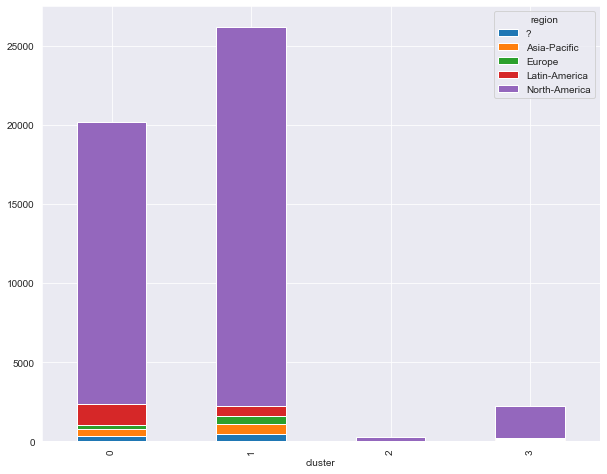

In [34]:
plot_data = dataset.groupby(['cluster', 'region']).size().reset_index().pivot(columns='region', index='cluster', values=0)
plot_data.plot(kind='bar', stacked=True, figsize=(10,8))



The clusters also seem to be similar in terms of race. The clusters are all predominantly "White", so I have used a log-scale to show the other differences. 

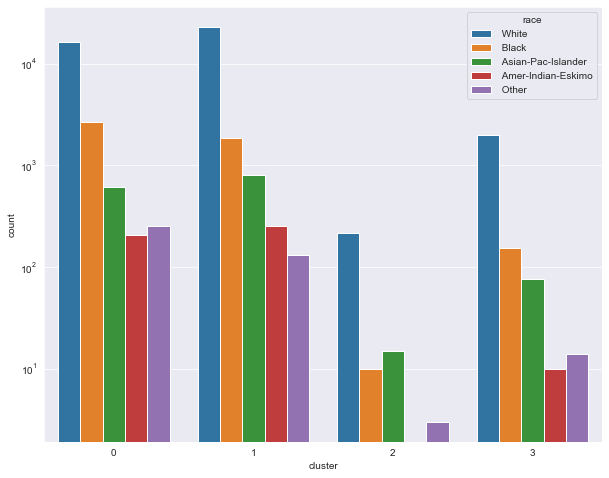

In [35]:
plt.figure(figsize=(10,8))
f = sns.countplot(x='cluster', data=dataset, hue='race')
f.set_yscale("log")

In [36]:
#dataset.to_csv('all_data_labeled_clusters.csv')   # uncomment to save the dataset with cluster labels